In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#####air 340-500.out

years = [f"{x:04d}" for x in range(0,1955)]
ii =0
result = np.zeros(1955)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120] # choose the data for the region of (40S~70S,50W~30E)
    TAUX = np.hstack((TAUX1,TAUX2))
    TT2 = np.mean(TAUX,axis=1)  # average for (50W~30E)
    LAT = data1.variables['lat'][80:280]
    result[ii] = LAT[np.where(TT2[:] == np.nanmin(TT2[:]))] # find out the biggest TAUX (due to direction, it is negative)
    ii = ii + 1

In [3]:
#ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')

In [4]:
# 20-330
years = [f"{x:04d}" for x in range(0,3719)]
ii =0
result2 = np.zeros(3719)

for yy in years:
    data1=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/TAUX300/CESM_TAU_'+yy+'_.nc')
    TAUX1 = data1.variables['TAUX'][0,80:280,-200:]
    TAUX2 = data1.variables['TAUX'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT3 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][80:280]
    #result2[ii] = LAT[np.where(TT3<0)[0][0]]
    #result2[ii] = LAT[np.where(TT3[:,:] == np.nanmin(TT3[:,:]))[0][0]]
    result2[ii] = LAT[np.where(TT3[:] == np.nanmin(TT3[:]))]
    ii = ii + 1

In [5]:
years = [f"{x:04d}" for x in range(0,96)]
ii =0
result5 = np.zeros(96)
# here PSL is TAUX !!!!!!!
for yy in years:
    data1=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/TAUX/CESM_PSL_'+yy+'_.nc')
    TAUX1 = data1.variables['PSL'][0,80:280,-200:]
    TAUX2 = data1.variables['PSL'][0,80:280,:120]
    TAUX = np.hstack((TAUX1,TAUX2))
    TT5 = np.mean(TAUX,axis=1)
    LAT = data1.variables['lat'][80:280]
    #result5[ii] = LAT[np.where(TT3<0)[0][0]]
    #result5[ii] = LAT[np.where(TAUX[:,:] == np.nanmin(TAUX[:,:]))[0][0]]
    result5[ii] = LAT[np.where(TT5[:] == np.nanmin(TT5[:]))]
    ii = ii + 1


In [6]:
result.shape

(1955,)

In [7]:
result2.shape

(3719,)

In [8]:
130*12

1560

In [9]:
result5.shape

(96,)

In [10]:
hh = np.hstack((result2,result5))
hh2 = np.hstack((hh,result))

In [11]:
ww222 = np.convolve(hh2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww222)

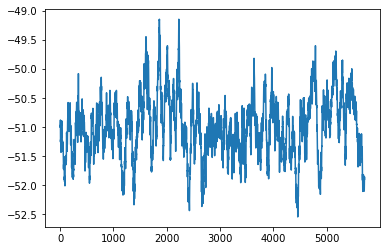

In [12]:
plt.plot(ww222)

In [13]:
hh2.shape

(5770,)

Text(0.5, 1.0, 'Postion of the biggest Westly wind  (50$^\\circ$W - 30$^\\circ$E Averaged)')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


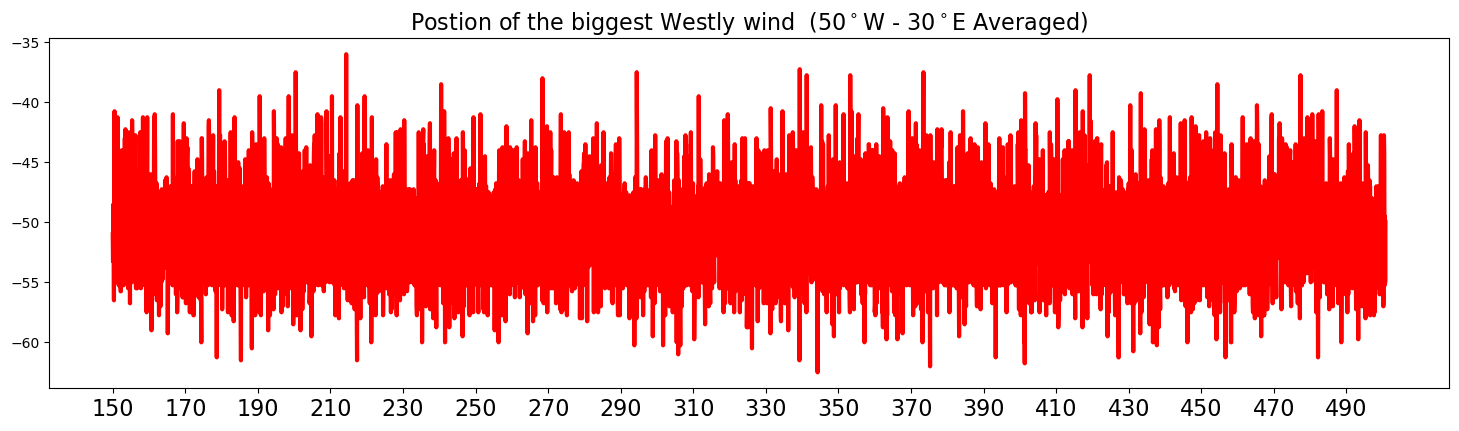

In [14]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(hh2[1560:],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
#########################################
#plt.vlines(noxxx, -48, -52, colors = "grey")
#plt.vlines(mrpxxx,  -48, -52, colors = "blue")
#plt.vlines(xxx,  -48, -52, colors = "yellow")
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
plt.xticks(range(0,4200,240), ['150', '170', '190', '210','230','250','270','290','310','330','350', '370', '390', '410','430','450','470','490','500'],**my_font)
#ax0.set(ylim=(-48, -52,),xlim=(0, 4170))
ax0.set_title('Postion of the biggest Westly wind  (50$^\circ$W - 30$^\circ$E Averaged)',**my_font)
#plt.savefig("positionmaxall.png",bbox_inches='tight',dpi=fig.dpi)

In [15]:
alld = hh2[:5760]

In [16]:
hh2.shape

(5770,)

In [17]:
alld.shape

(5760,)

In [18]:
d4 = alld.reshape(480,12)

In [19]:
d5 = np.nanmean(d4,axis=1)

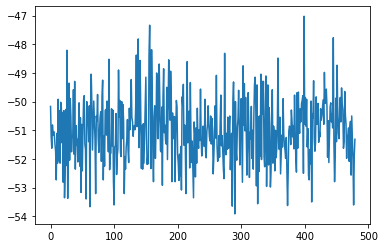

In [20]:
plt.plot(d5)

In [27]:
w2 = np.convolve(d5, np.ones((5,))/5, mode='valid')


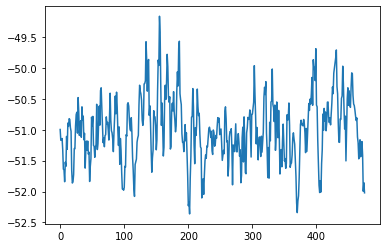

In [28]:
plt.plot(w2)

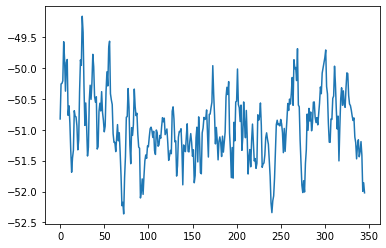

In [29]:
plt.plot(w2[130:])

In [30]:
w2.shape

(476,)

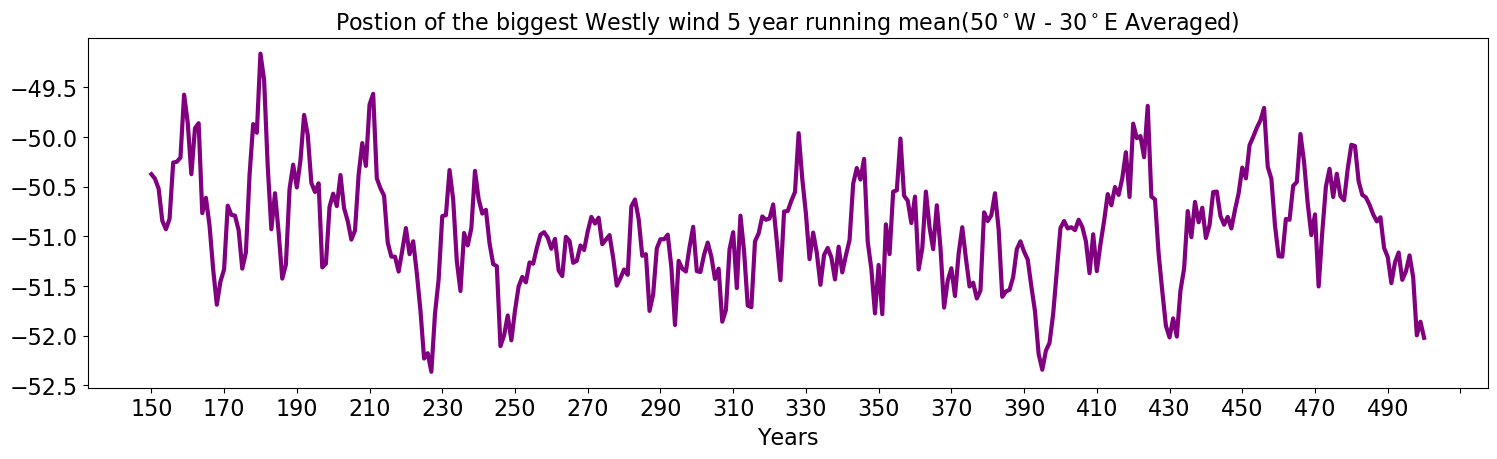

In [33]:
t = np.arange(2,348,1)
#t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(w2[125:],'purple',linewidth=3)
#plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################

##########################################################################
#ax0.set(ylim=(3300, 3850),xlim=(0, 3720))
plt.xticks(range(0,481,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490'],**my_font)
#plt.vlines(noxx, -54, -52, colors = "grey",linewidth=3)
#plt.vlines(mrpxx,  -54, -52, colors = "blue",linewidth=3)
#plt.vlines(wspxx,  -54, -52, colors = "yellow",linewidth=3)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.title('Postion of the biggest Westly wind 5 year running mean(50$^\circ$W - 30$^\circ$E Averaged)',color= 'black',**my_font)
plt.axis("tight")
#ax0.set(ylim=(-54, -52),xlim=(0, 350))
plt.savefig("positionmaxye.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

In [ ]:
wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

In [ ]:
list_before = wspxx
list_after = [val for val in list_before for i in range(12)]

In [ ]:
xxx = np.reshape(list_after,(106,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [ ]:
list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]

In [ ]:
mrpxxx = np.reshape(list_after,(216,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [ ]:
list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(134,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

In [ ]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww222[1560:],'red',linewidth=3)
#ax0.plot(0.0001*result,'red',linewidth=3)
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
#########################################
plt.vlines(noxxx, -49, -52.5, colors = "grey")
plt.vlines(mrpxxx,  -49, -52.5, colors = "blue")
plt.vlines(xxx,  -49, -52.5, colors = "yellow")
plt.hlines(mean, 0, 4200, colors = "g",linestyles = "dashed")
plt.xticks(range(0,4200,240), ['150', '170', '190', '210','230','250','270','290','310','330','350', '370', '390', '410','430','450','470','490','500'],**my_font)
#ax0.set(ylim=(-49, -52.5),xlim=(0, 4170))
ax0.set_title('Postion of the biggest Westly wind (50$^\circ$W - 30$^\circ$E Averaged), all months, 5 year running mean',**my_font)
plt.savefig("positionmax.png",bbox_inches='tight',dpi=fig.dpi)